## ZS Problem Statement

In [1]:
# Importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# urls
url_train = 'input_train_v1.csv' #traing dataset
url_test = 'input_test_v1.csv' #test dataset

In [3]:
## making dataframe

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

## Data Exploration

In [4]:
df_train.head(10)

,pat_iden,time_from_anchor,Event_name,lab_result_numeric,Event_desc,y_flag
0,100225,536,rx_nsaina,NaN,non steroidal anti inflammatory nsaid agents,1
1,102871,92,lb_td_1,262.0,Transferrin.direct,1
2,102469,564,lb_bud_1,NaN,Blood.urine.dipstick,1
3,100641,307,lb_hh_1,34.0,Hematocrit (HCT),1
4,100017,9,wt_ht_BMI,24.4,BMI,0
5,100511,10,dx_cd_1,NaN,Complication of device; implant or graft,0
6,102496,92,rx_fxi,NaN,factor xa inhibitors,1
7,100000,619,lb_gr_1,129.0,Glucose.random,1
8,100846,103,dx_omg_1,NaN,Other male genital disorders,1
9,100178,41,lb_pmvm_1,8.1,Platelet mean volume (MPV),1


In [5]:
df_test.head()

,pat_iden,time_from_anchor,Event_name,lab_result_numeric,Event_desc,Unnamed: 5
0,101669,352,wt_ht_BMI,27.983927,BMI,NaN
1,103086,359,wt_ht_BMI,29.200000,BMI,NaN
2,101251,357,lb_gr_1,129.000000,Glucose.random,NaN
3,100431,311,dx_bd_1,NaN,Nonmalignant breast conditions,NaN
4,100102,344,rx_s,NaN,sympathomimetics,NaN


In [6]:
print('df_train_shape',df_train.shape)
print('df_test_shape',df_test.shape)

df_train_shape (1319675, 6)
df_test_shape (565576, 6)


In [7]:
print(df_train.describe()), print(df_test.describe())

           pat_iden  time_from_anchor  lab_result_numeric        y_flag
count  1.319675e+06      1.319675e+06       698398.000000  1.319675e+06
mean   1.012791e+05      2.895538e+02           52.531553  6.453725e-01
std    1.059223e+03      1.819767e+02          197.964968  4.784005e-01
min    1.000000e+05      1.000000e+00          -16.000000  0.000000e+00
25%    1.002690e+05      1.410000e+02            4.600000  0.000000e+00
50%    1.010900e+05      2.890000e+02           24.116546  1.000000e+00
75%    1.021510e+05      3.740000e+02           90.000000  1.000000e+00
max    1.037190e+05      7.200000e+02        70000.010000  1.000000e+00
            pat_iden  time_from_anchor  lab_result_numeric  Unnamed: 5
count  565576.000000     565576.000000       298841.000000         0.0
mean   101278.168313        289.409899           52.223021         NaN
std      1058.927788        181.949254          154.786194         NaN
min    100000.000000          1.000000          -16.000000         N

(None, None)

In [8]:
df_train.dtypes

pat_iden                int64
time_from_anchor        int64
Event_name             object
lab_result_numeric    float64
Event_desc             object
y_flag                  int64
dtype: object

#### Class Information

Class 0 percentage 52.76881720430108 %
Class 1 percentage 47.23118279569892


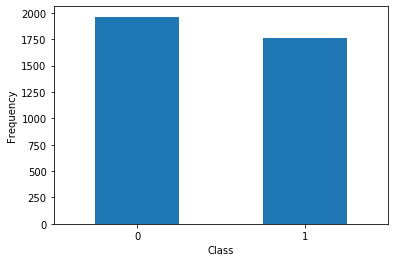

In [9]:
def class_plot(df,target):
    count_classes = pd.value_counts(df[target],sort=True)
    count_classes.plot(kind='bar',rot=0)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    return count_classes

dfexp = df_train
dfexp = dfexp.groupby(['pat_iden'])['y_flag'].max().reset_index()
dfexp.head()
    
count_classes = class_plot(dfexp,'y_flag')
total_count = count_classes[0] + count_classes[1]
print("Class 0 percentage", (count_classes[0]/total_count)*100,"%")
print("Class 1 percentage", (count_classes[1]/total_count)*100)

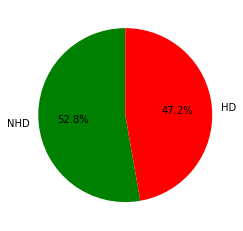

NHD Count :- 1963
HD Count :- 1757


In [10]:
class_count = [count_classes[0], count_classes[1]]
class_name = ['NHD', 'HD']
colors = ['g', 'r']

plt.pie(class_count, labels=class_name, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

print("NHD Count :-", count_classes[0])
print("HD Count :-", count_classes[1])

#### Missing Data Information

In [11]:
def missing_data(df):
    totalt = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_train = missing_data(df_train)
print ("Missing Data at Training")
missing_train

Missing Data at Training


,Total,Percent
lab_result_numeric,621277,0.470780
Event_desc,784,0.000594
y_flag,0,0.000000
Event_name,0,0.000000
time_from_anchor,0,0.000000
pat_iden,0,0.000000


##### Missing Values will be treated in feature generation approach

## Understanding the trend

### No of check-ups

In [12]:
dfid1 = df_train.loc[df_train.y_flag == 1]
dfid0 = df_train.loc[df_train.y_flag == 0]

id1 = list(dfid1['pat_iden'])
id0 = list(dfid0['pat_iden'])

id1 = set(id1)
id1 = list(id1)
#id1[:5]

id0 = set(id0)
id0 = list(id0)
#id1[:20]
id0[400:405]

[100804, 100805, 100806, 100810, 100811]

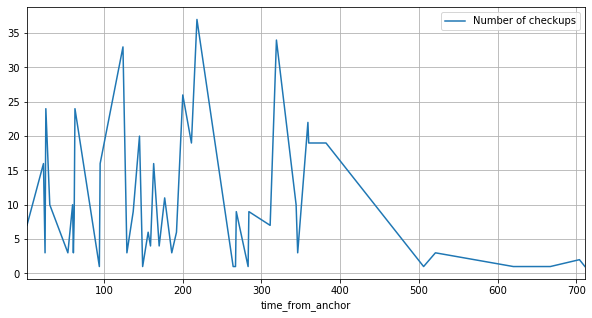

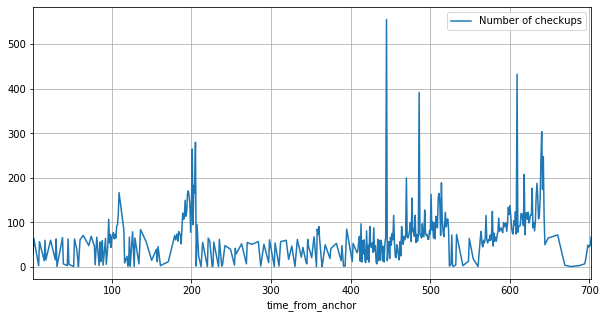

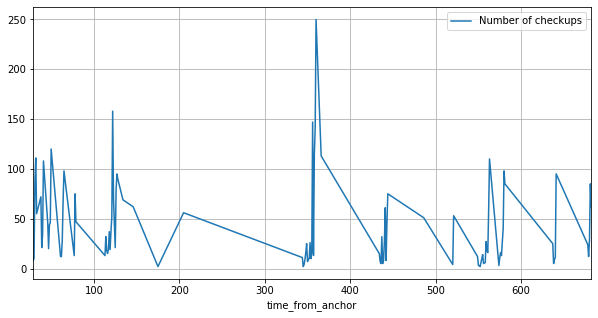

In [13]:
id1 = [102568,100000,100002]
for itr in id1:
    dfid1 = df_train.loc[df_train.pat_iden == itr] 
    #print(len(dfid1))
    #print(len(dfid1['time_from_anchor'].unique()))
    dfid1 = dfid1.groupby(['time_from_anchor'])['Event_name'].count().reset_index()
    dfid1.rename(columns = {"Event_name": "Number of checkups"}, inplace = True)
    #dfid1.head()
    dfid1.plot(x='time_from_anchor', y='Number of checkups', figsize=(10,5), grid=True)

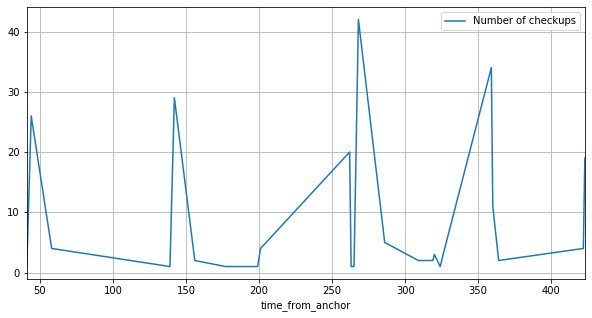

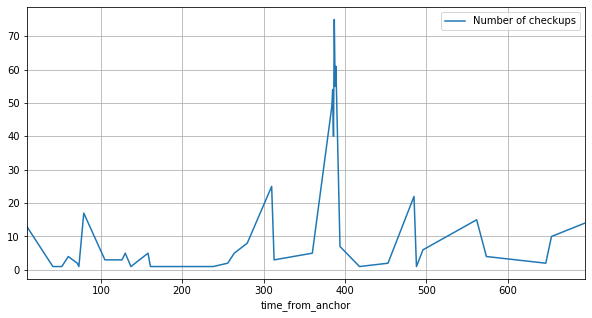

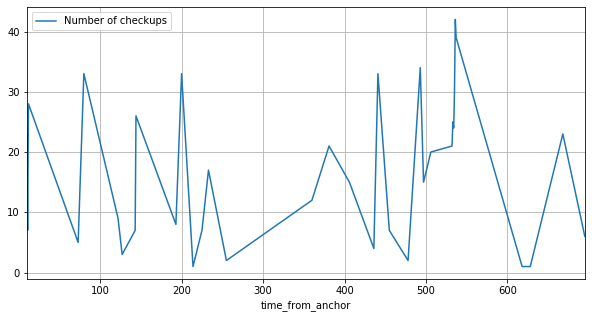

In [14]:
id0 = [100832, 100804, 100543]
for itr in id0:
    dfid0 = df_train.loc[df_train.pat_iden == itr] 
    #print(len(dfid1))
    #print(len(dfid1['time_from_anchor'].unique()))
    dfid0 = dfid0.groupby(['time_from_anchor'])['Event_name'].count().reset_index()
    dfid0.rename(columns = {"Event_name": "Number of checkups"}, inplace = True)
    #dfid1.head()
    dfid0.plot(x='time_from_anchor', y='Number of checkups', figsize=(10,5), grid=True)

### Check - up result

In [15]:
#### Average BMI

33.548667803613895
19.77514711916421
28.22472025599459


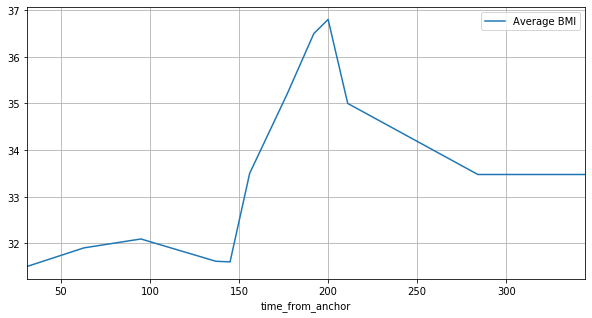

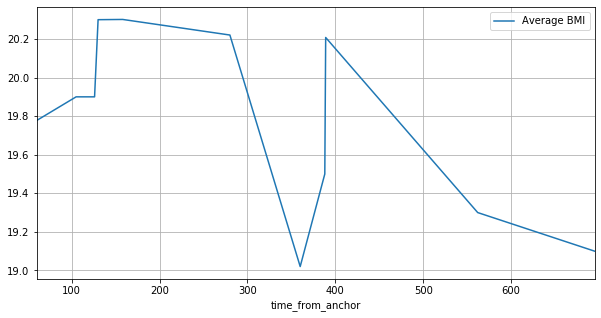

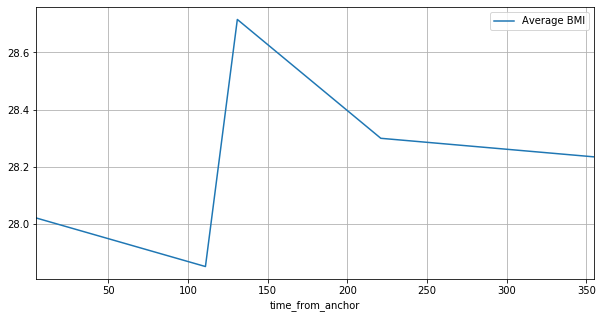

In [16]:
id1 = [102568,100804,100562]
for itr in id1:
    dfid1 = df_train.loc[df_train.pat_iden == itr] 
    dfid1 = dfid1.loc[df_train.Event_desc == 'BMI']
    #print(len(dfid1))
    #print(len(dfid1['time_from_anchor'].unique()))
    dfid1 = dfid1.groupby(['time_from_anchor'])['lab_result_numeric'].mean().reset_index()
    dfid1.rename(columns = {"lab_result_numeric": "Average BMI"}, inplace = True)
    dfid1.head()
    print(dfid1['Average BMI'].mean())
    dfid1.plot(x='time_from_anchor', y='Average BMI', figsize=(10,5), grid=True)

## Feature Generation

In [17]:
print("No of patients ",len(df_train['pat_iden'].unique()))
print("No of observations ",len(df_train['pat_iden']))

No of patients  3720
No of observations  1319675


In [18]:
print(len(df_test['pat_iden'].unique()))
print(len(df_test['pat_iden']))

3720
565576


###### Number of patients is 3720 where as number of observation is 1319675 so this is timely data of patient checkup

## Making Features

### Approach 1

#### In this approach I will use concepta of bucketing for feature generation. Given data is of 2 years approx. i.e. 720 days. So I will count the number of check-ups done on a particular patien (each unique pat_iden) in different intervals. i.e. 30 days, 60 days, 120 days, 240 days, 480 days, 720 days.

In [19]:
# Train set (filtering data on different intervals)

df30 = df_train.loc[df_train.time_from_anchor <= 30]
df60 = df_train.loc[df_train.time_from_anchor <= 60]
df120 = df_train.loc[df_train.time_from_anchor <= 120]
df240 = df_train.loc[df_train.time_from_anchor <= 240]
df480 = df_train.loc[df_train.time_from_anchor <= 480]
df720 = df_train.loc[df_train.time_from_anchor <= 720]

In [20]:
# Test set (filtering data on different intervals)

tdf30 = df_test.loc[df_test.time_from_anchor <= 30]
tdf60 = df_test.loc[df_test.time_from_anchor <= 60]
tdf120 = df_test.loc[df_test.time_from_anchor <= 120]
tdf240 = df_test.loc[df_test.time_from_anchor <= 240]
tdf480 = df_test.loc[df_test.time_from_anchor <= 480]
tdf720 = df_test.loc[df_test.time_from_anchor <= 720]

In [21]:
# Train set (counting number of checkups in different intervals)

ndf30 = df30.groupby(['pat_iden']).count()
ndf60 = df60.groupby(['pat_iden']).count()
ndf120 = df120.groupby(['pat_iden']).count()
ndf240 = df240.groupby(['pat_iden']).count()
ndf480 = df480.groupby(['pat_iden']).count()
ndf720 = df720.groupby(['pat_iden']).count()

In [22]:
# Test Set (counting number of checkups in different intervals)

tndf30 = tdf30.groupby(['pat_iden']).count()
tndf60 = tdf60.groupby(['pat_iden']).count()
tndf120 = tdf120.groupby(['pat_iden']).count()
tndf240 = tdf240.groupby(['pat_iden']).count()
tndf480 = tdf480.groupby(['pat_iden']).count()
tndf720 = tdf720.groupby(['pat_iden']).count()

In [23]:
# Train set (Making dataframe of under 30 days data)

id30 = list(df30['pat_iden'].unique())
id30.sort()
print(len(id30))
c30 = ndf30['y_flag']
print(len(c30))
fdf30 = pd.DataFrame(list(zip(id30, c30)), columns =['id', 'u30']) 
fdf30.head()

2256
2256


,id,u30
0,100000,381
1,100002,18
2,100003,17
3,100004,55
4,100006,67


In [24]:
# Test Set (Making dataframe of under 30 days data)

tid30 = list(tdf30['pat_iden'].unique())
tid30.sort()
print(len(tid30))
tc30 = tndf30['Event_name']
print(len(tc30))
tfdf30 = pd.DataFrame(list(zip(tid30, tc30)), columns =['id', 'u30']) 
tfdf30.head()

2013
2013


,id,u30
0,100000,141
1,100002,11
2,100003,11
3,100004,25
4,100006,33


In [25]:
# Train set (Making dataframe of under 60 days data)

id60 = list(df60['pat_iden'].unique())
id60.sort()
print(len(id60))
c60 = ndf60['y_flag']
print(len(c60))
fdf60 = pd.DataFrame(list(zip(id60, c60)), columns =['id', 'u60']) 
fdf60.head()

2833
2833


,id,u60
0,100000,758
1,100001,1
2,100002,783
3,100003,54
4,100004,55


In [26]:
# Test set (Making dataframe of under 60 days data)

tid60 = list(tdf60['pat_iden'].unique())
tid60.sort()
print(len(tid60))
tc60 = tndf60['Event_name']
print(len(c60))
tfdf60 = pd.DataFrame(list(zip(tid60, tc60)), columns =['id', 'u60']) 
tfdf60.head()

2662
2833


,id,u60
0,100000,322
1,100001,1
2,100002,331
3,100003,29
4,100004,25


In [27]:
# Train set (Making dataframe of under 120 days data)

id120 = list(df120['pat_iden'].unique())
id120.sort()
print(len(id120))
c120 = ndf120['y_flag']
print(len(c120))
fdf120 = pd.DataFrame(list(zip(id120, c120)), columns =['id', 'u120']) 
fdf120.head()

3322
3322


,id,u120
0,100000,2703
1,100001,1
2,100002,1326
3,100003,87
4,100004,118


In [28]:
# Test set (Making dataframe of under 120 days data)

tid120 = list(tdf120['pat_iden'].unique())
tid120.sort()
print(len(tid120))
tc120 = tndf120['Event_name']
print(len(tc120))
tfdf120 = pd.DataFrame(list(zip(tid120, tc120)), columns =['id', 'u120']) 
tfdf120.head()

3241
3241


,id,u120
0,100000,1195
1,100001,1
2,100002,561
3,100003,44
4,100004,52


In [29]:
# Train set (Making dataframe of under 240 days data)

id240 = list(df240['pat_iden'].unique())
id240.sort()
print(len(id240))
c240 = ndf240['y_flag']
print(len(c240))
fdf240 = pd.DataFrame(list(zip(id240, c240)), columns =['id', 'u240']) 
fdf240.head()

3609
3609


,id,u240
0,100000,6962
1,100001,2
2,100002,2079
3,100003,812
4,100004,177


In [30]:
# Test set (Making dataframe of under 240 days data)

tid240 = list(tdf240['pat_iden'].unique())
tid240.sort()
print(len(tid240))
tc240 = tndf240['Event_name']
print(len(tc240))
tfdf240 = pd.DataFrame(list(zip(tid240, tc240)), columns =['id', 'u240']) 
tfdf240.head()

3574
3574


,id,u240
0,100000,3093
1,100001,1
2,100002,876
3,100003,376
4,100004,77


In [31]:
# Train set (Making dataframe of under 480 days data)

id480 = list(df480['pat_iden'].unique())
id480.sort()
print(len(id480))
c480 = ndf480['y_flag']
print(len(c480))
fdf480 = pd.DataFrame(list(zip(id480, c480)), columns =['id', 'u480']) 
fdf480.head()

3720
3720


,id,u480
0,100000,13126
1,100001,467
2,100002,3293
3,100003,881
4,100004,1441


In [32]:
# test set (Making dataframe of under 480 days data)

tid480 = list(tdf480['pat_iden'].unique())
tid480.sort()
print(len(tid480))
tc480 = tndf480['Event_name']
print(len(tc480))
tfdf480 = pd.DataFrame(list(zip(tid480, tc480)), columns =['id', 'u480']) 
tfdf480.head()

3720
3720


,id,u480
0,100000,5714
1,100001,209
2,100002,1353
3,100003,393
4,100004,576


In [33]:
# Train set (Making dataframe of under 720 days data)

id720 = list(df720['pat_iden'].unique())
id720.sort()
print(len(id720))
c720 = ndf720['y_flag']
print(len(c720))
fdf720 = pd.DataFrame(list(zip(id720, c720)), columns =['id', 'u720']) 
fdf720.head()

3720
3720


,id,u720
0,100000,26867
1,100001,468
2,100002,4336
3,100003,918
4,100004,1539


In [34]:
# Test set (Making dataframe of under 720 days data)

tid720 = list(tdf720['pat_iden'].unique())
tid720.sort()
print(len(tid720))
tc720 = tndf720['Event_name']
print(len(tc720))
tfdf720 = pd.DataFrame(list(zip(tid720, tc720)), columns =['id', 'u720']) 
tfdf720.head()

3720
3720


,id,u720
0,100000,11665
1,100001,210
2,100002,1797
3,100003,414
4,100004,617


##### Merging Dataframe

In [35]:
# Train set

aux1 = pd.merge(fdf30, fdf60, how="outer")
aux2 = pd.merge(aux1, fdf120, how="outer")
aux3 = pd.merge(aux2, fdf240, how="outer")
aux4 = pd.merge(aux3, fdf480, how="outer")
aux5 = pd.merge(aux4, fdf720, how="outer")

In [36]:
# Test Set

taux1 = pd.merge(tfdf30, tfdf60, how="outer")
taux2 = pd.merge(taux1, tfdf120, how="outer")
taux3 = pd.merge(taux2, tfdf240, how="outer")
taux4 = pd.merge(taux3, tfdf480, how="outer")
taux5 = pd.merge(taux4, tfdf720, how="outer")

In [37]:
# Train set

aux5.fillna(0, inplace=True)
aux5= aux5.sort_values(by=['id'])
aux5.head()
#taux5.to_csv('train.csv')

,id,u30,u60,u120,u240,u480,u720
0,100000,381.0,758.0,2703.0,6962.0,13126,26867
2256,100001,0.0,1.0,1.0,2.0,467,468
1,100002,18.0,783.0,1326.0,2079.0,3293,4336
2,100003,17.0,54.0,87.0,812.0,881,918
3,100004,55.0,55.0,118.0,177.0,1441,1539


In [38]:
# Test set

taux5.fillna(0, inplace=True)
taux5= taux5.sort_values(by=['id'])
taux5.head()
#taux5.to_csv('test.csv')

,id,u30,u60,u120,u240,u480,u720
0,100000,141.0,322.0,1195.0,3093.0,5714,11665
2013,100001,0.0,1.0,1.0,1.0,209,210
1,100002,11.0,331.0,561.0,876.0,1353,1797
2,100003,11.0,29.0,44.0,376.0,393,414
3,100004,25.0,25.0,52.0,77.0,576,617


#### Making target variable column from the train data

In [39]:
dfyn = df_train.sort_values(by=['pat_iden'])
dfyn.head()

,pat_iden,time_from_anchor,Event_name,lab_result_numeric,Event_desc,y_flag
946407,100000,298,lb_rbccr_1,3.87,Red blood cell count (RBC),1
1267233,100000,204,lb_a_2,2.00,Albumin,1
674718,100000,101,px_sg_1,NaN,Skin graft,1
855234,100000,438,lb_ct_1,8.50,Calcium.total,1
467567,100000,570,lb_lp_1,37.60,Lymphocyte.percent,1


In [40]:
idy = list(dfyn['pat_iden'])
y = list(dfyn['y_flag'])
dfy = pd.DataFrame(list(zip(idy, y)), columns =['id', 'y']) 
dfy.head()

,id,y
0,100000,1
1,100000,1
2,100000,1
3,100000,1
4,100000,1


In [41]:
ndfy = dfy.groupby(['id']).mean()
yn = list(ndfy['y'])
dfyf = pd.DataFrame(list(zip(id720, yn)), columns =['id', 'y']) 
final = pd.merge(aux5, dfyf, how="outer")
final.head()

,id,u30,u60,u120,u240,u480,u720,y
0,100000,381.0,758.0,2703.0,6962.0,13126,26867,1
1,100001,0.0,1.0,1.0,2.0,467,468,0
2,100002,18.0,783.0,1326.0,2079.0,3293,4336,1
3,100003,17.0,54.0,87.0,812.0,881,918,0
4,100004,55.0,55.0,118.0,177.0,1441,1539,1


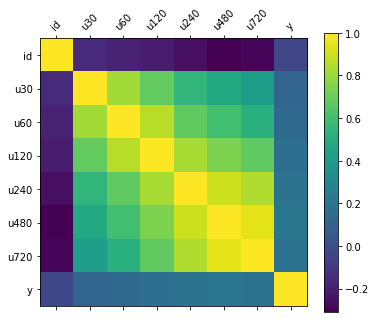

In [42]:
# Correlation analysis

df = final

f = plt.figure(figsize=(6, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=10);

In [43]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,u30,u60,u120,u240,u480,u720,y
id,1,-0.16,-0.18,-0.21,-0.25,-0.31,-0.28,-0.033
u30,-0.16,1,0.82,0.69,0.55,0.49,0.42,0.12
u60,-0.18,0.82,1,0.86,0.68,0.61,0.52,0.14
u120,-0.21,0.69,0.86,1,0.83,0.74,0.68,0.17
u240,-0.25,0.55,0.68,0.83,1,0.9,0.84,0.19
u480,-0.31,0.49,0.61,0.74,0.9,1,0.95,0.2
u720,-0.28,0.42,0.52,0.68,0.84,0.95,1,0.18
y,-0.033,0.12,0.14,0.17,0.19,0.2,0.18,1


In [44]:
dftmp = final
dftmp = dftmp.groupby('y').mean()
#del dftmp['id']
dftmp

,id,u30,u60,u120,u240,u480,u720
y,,,,,,,
0,101892.765665,13.658176,25.831381,48.895059,97.629648,200.300560,238.407030
1,101822.334092,28.352305,57.468412,108.233352,208.596471,404.767786,484.736483


In [45]:
#dfid1.plot(x='time_from_anchor', y='Average BMI', figsize=(10,5), grid=True)

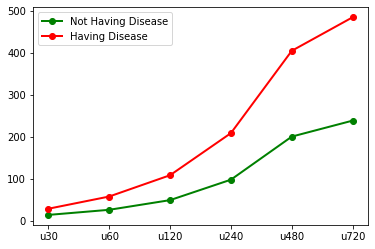

In [46]:
for i in range(len(dftmp)):
    if(i==0):
        plt.plot(dftmp.iloc[i,1:], color='green', marker='o',linewidth=2,label="Not Having Disease")
        plt.legend(loc="upper left")
    if(i==1):
        plt.plot(dftmp.iloc[i,1:], color='red', marker='o',linewidth=2,label="Having Disease")
        plt.legend(loc="upper left")

#### final training and test set using Approach 1

In [47]:
train_app1 = final
test_app1 = taux5

## Approach 2

### In this approach I will use check-up results i.e. symptoms to generate features

In [48]:
dfexp = df_train.loc[df_train.lab_result_numeric.isnull() == False]
print(len(dfexp))
len(dfexp['Event_desc'].unique())
del dfexp['Event_name']
dfid = dfexp.sort_values(by=['pat_iden']).groupby('pat_iden').mean()
y = list(dfid['y_flag'])
#len(y)
dfexp.head()

698398


,pat_iden,time_from_anchor,lab_result_numeric,Event_desc,y_flag
1,102871,92,262.0,Transferrin.direct,1
3,100641,307,34.0,Hematocrit (HCT),1
4,100017,9,24.4,BMI,0
7,100000,619,129.0,Glucose.random,1
9,100178,41,8.1,Platelet mean volume (MPV),1


In [49]:
df=dfexp.groupby(['pat_iden', 'Event_desc'])['lab_result_numeric'].mean().reset_index()
df=df.pivot_table(index = 'pat_iden', columns = ['Event_desc'], values = 'lab_result_numeric').reset_index()
df.columns = list(df.columns)
df.fillna(0, inplace = True)
#print(len(df))
df['y'] = y
dftmp = df.groupby('y').mean()
df.head()

,pat_iden,Acetaminophen,Alanine aminotransferase (ALT),Albumin,Albumin/creatinine ratio.urine,Alkaline phosphatase.total (ALP),Alpha-1-Antitrypsin (AAT),Amylase.total,Anion gap,Aspartate aminotransferase (AST),...,Troponin.T (TNT),Uric acid,Vancomycin.random,Vancomycin.trough,Vitamin B12,Vitamin D; 25-OH.total (VIT D),Weight,White blood cell count (WBC),eGFR,y
0,100000,0.00,52.842444,2.726621,0.0,409.632787,0.0,40.4975,10.480349,52.432692,...,0.0,0.000000,0.0,10.738261,0.000000,0.0,64.956923,12.903243,53.928741,1.0
1,100001,1.99,0.000000,1.900000,0.0,113.000000,0.0,0.0000,9.600000,30.000000,...,0.0,0.000000,0.0,0.000000,173.000000,0.0,65.900000,10.740000,74.909091,0.0
2,100002,0.00,20.562500,3.722000,0.0,132.642857,0.0,0.0000,13.069767,22.526316,...,0.0,5.900000,0.0,0.000000,527.333333,25.0,68.434828,7.125000,33.833333,1.0
3,100003,0.00,42.000000,3.428571,0.0,85.000000,0.0,0.0000,0.000000,33.500000,...,0.0,0.000000,0.0,4.000000,0.000000,20.9,90.856000,6.635714,93.521739,0.0
4,100004,0.00,21.000000,3.043750,0.0,72.210526,0.0,46.0000,0.000000,13.235294,...,0.0,9.428571,0.0,0.000000,0.000000,0.0,0.000000,11.509524,29.595238,1.0


(0, 200)

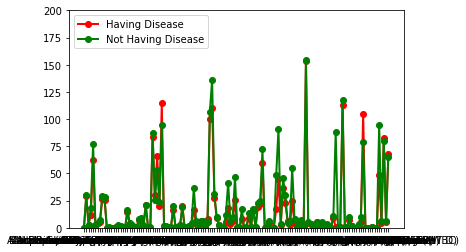

In [50]:
plt.plot(dftmp.iloc[0,1:], color='red', marker='o',linewidth=2,label="Having Disease")
plt.legend(loc="upper left")
plt.ylim(0, 200)

plt.plot(dftmp.iloc[1,1:], color='green', marker='o',linewidth=2,label="Not Having Disease")
plt.legend(loc="upper left")
plt.ylim(0,200)


In [51]:
dftmp = df.iloc[:,125:136]
#dftmp.head()
corr = dftmp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Troponin.I (TNI),Troponin.T (TNT),Uric acid,Vancomycin.random,Vancomycin.trough,Vitamin B12,Vitamin D; 25-OH.total (VIT D),Weight,White blood cell count (WBC),eGFR,y
Troponin.I (TNI),1,0.0017,0.0097,0.0071,0.031,-0.00084,0.018,-0.0076,0.072,-0.0046,0.012
Troponin.T (TNT),0.0017,1,0.044,0.12,0.0041,0.00011,0.019,0.0083,0.055,0.0027,0.017
Uric acid,0.0097,0.044,1,0.0022,0.054,0.094,0.1,0.011,0.069,-0.016,0.041
Vancomycin.random,0.0071,0.12,0.0022,1,0.19,0.041,0.041,-0.0037,0.05,-0.028,0.047
Vancomycin.trough,0.031,0.0041,0.054,0.19,1,0.098,0.047,0.0056,0.046,0.0065,0.056
Vitamin B12,-0.00084,0.00011,0.094,0.041,0.098,1,0.14,-0.0063,0.081,0.025,0.095
Vitamin D; 25-OH.total (VIT D),0.018,0.019,0.1,0.041,0.047,0.14,1,-0.059,0.065,0.059,0.063
Weight,-0.0076,0.0083,0.011,-0.0037,0.0056,-0.0063,-0.059,1,-0.00061,0.071,-0.041
White blood cell count (WBC),0.072,0.055,0.069,0.05,0.046,0.081,0.065,-0.00061,1,0.25,0.094
eGFR,-0.0046,0.0027,-0.016,-0.028,0.0065,0.025,0.059,0.071,0.25,1,-0.037


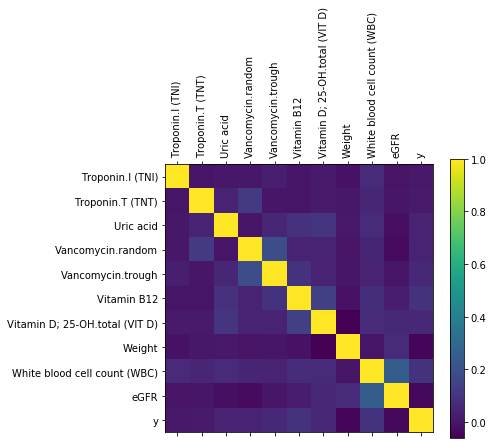

In [52]:
df = dftmp

f = plt.figure(figsize=(6, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=10);

In [53]:
dftr = df_train
dfts = df_test

X = dftr.iloc[:,:-1]
tX = dfts.iloc[:,:]
y = dftr.iloc[:, -1]
#dftrs = dftr.sort_values(by=['pat_iden'])
pat_id = list(dftr['pat_iden'].unique())
tpat_id = list(dftr['pat_iden'].unique())
pat_id.sort()
tpat_id.sort()
print(len(pat_id))
print(len(tpat_id))

3720
3720


In [54]:
tX.head()
#print(X.columns)

,pat_iden,time_from_anchor,Event_name,lab_result_numeric,Event_desc,Unnamed: 5
0,101669,352,wt_ht_BMI,27.983927,BMI,NaN
1,103086,359,wt_ht_BMI,29.200000,BMI,NaN
2,101251,357,lb_gr_1,129.000000,Glucose.random,NaN
3,100431,311,dx_bd_1,NaN,Nonmalignant breast conditions,NaN
4,100102,344,rx_s,NaN,sympathomimetics,NaN


In [55]:
#a = pd.get_dummies(df['Event_name'], prefix = "Event_name")
b = pd.get_dummies(dftr['Event_desc'], prefix = "")
frames = [X, b]
X = pd.concat(frames, axis = 1)

In [56]:
b = pd.get_dummies(dfts['Event_desc'], prefix = "")
frames = [tX, b]
tX = pd.concat(frames, axis = 1)

In [61]:
# del X["time_from_anchor"]
# del X["Event_name"]
# del X["lab_result_numeric"]
# del X["Event_desc"]

# del tX["time_from_anchor"]
# del tX["Event_name"]
# del tX["lab_result_numeric"]
# del tX["Event_desc"]
# del tX["Unnamed: 5"]

In [62]:
count = X.groupby("pat_iden").count()
tcount = tX.groupby("pat_iden").count()

In [63]:
count["id"] = pat_id
tcount["id"] = tpat_id

In [64]:
tcount.head()

,_ alpha reductase inhibitors for bph,_Abdominal hernia,_Abdominal pain,_Acetaminophen,_Acquired foot deformities,_Acute and unspecified renal failure,_Acute bronchitis,_Acute cerebrovascular disease,_Acute myocardial infarction,_Acute posthemorrhagic anemia,...,_vasopressors circulatory shock,_viral vaccines,_vitamin a analogs,_vitamin b derivatives,_vitamin b products,_vitamin c derivatives,_vitamin d analogs,_vitamin e analogs,_vitamin k products,id
pat_iden,,,,,,,,,,,,,,,,,,,,,
100000,11665,11665,11665,11665,11665,11665,11665,11665,11665,11665,...,11665,11665,11665,11665,11665,11665,11665,11665,11665,100000
100001,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,100001
100002,1797,1797,1797,1797,1797,1797,1797,1797,1797,1797,...,1797,1797,1797,1797,1797,1797,1797,1797,1797,100002
100003,414,414,414,414,414,414,414,414,414,414,...,414,414,414,414,414,414,414,414,414,100003
100004,617,617,617,617,617,617,617,617,617,617,...,617,617,617,617,617,617,617,617,617,100004


In [65]:
#tcount.to_csv('test_count.csv')

In [66]:
train_app2 = df
#test_app2 = tcount

In [67]:
## Merging the 2 dataset
train_app2 = train_app2.rename(columns={"pat_iden": "id"})

In [68]:
train_final = pd.merge(train_app1, train_app2, how="outer")
#test_final = pd.merge(test_app1, test_app2, how="outer")

In [69]:
train_final.head()

,id,u30,u60,u120,u240,u480,u720,y,Troponin.I (TNI),Troponin.T (TNT),Uric acid,Vancomycin.random,Vancomycin.trough,Vitamin B12,Vitamin D; 25-OH.total (VIT D),Weight,White blood cell count (WBC),eGFR
0,100000,381.0,758.0,2703.0,6962.0,13126,26867,1,0.360000,0.0,0.000000,0.0,10.738261,0.000000,0.000000,64.956923,12.903243,53.928741
1,100000,381.0,758.0,2703.0,6962.0,13126,26867,1,0.030000,0.0,5.900000,0.0,0.000000,527.333333,25.000000,68.434828,7.125000,33.833333
2,100000,381.0,758.0,2703.0,6962.0,13126,26867,1,0.000000,0.0,9.428571,0.0,0.000000,0.000000,0.000000,0.000000,11.509524,29.595238
3,100000,381.0,758.0,2703.0,6962.0,13126,26867,1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,122.215000,9.082759,61.805556
4,100000,381.0,758.0,2703.0,6962.0,13126,26867,1,0.593636,0.0,4.066667,0.0,0.000000,266.000000,39.666667,65.720000,6.210526,54.263158


## Making the Classification Model

#### XGBoost (Since it performs best on such data)

In [70]:
# Importing Libraries 

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6,4

target = 'y'
IDcol = 'id'

In [71]:
def modelfit(alg, dtrain, val, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    val_predictors = [x for x in val.columns if x not in [IDcol,target]]
    eval_s = [(dtrain[predictors], dtrain[target]),(val[predictors], val[target])]
    alg.fit(dtrain[predictors], dtrain[target],early_stopping_rounds=10,eval_metric=["error", "logloss"],eval_set=eval_s,verbose=True)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Train Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    
    
    # retrieve performance metrics
    results = alg.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    plt.savefig("log.png")
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()
    plt.savefig('error.png')
    
    
    #print(alg.feature_importances_)
#     f = plot_importance(alg)
#     plt.show()
#     f.figure.savefig("feat_imp.pdf")

    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [72]:
# Train and validation set 

from sklearn.model_selection import train_test_split
train = train_final
train, val = train_test_split(train,test_size=0.2, random_state=42)
print(train.shape)
print(val.shape)

(5549193, 18)
(1387299, 18)


In [73]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

### Training

In [ ]:
modelfit(xgb1, train, val, predictors)

### Model Evaluation

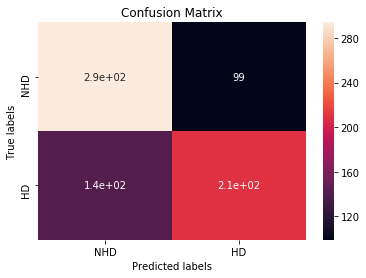

In [278]:
from sklearn.metrics import confusion_matrix
val_predictors = [x for x in val.columns if x not in [IDcol,target]]
val_predictions = xgb1.predict(val[predictors])
cm = confusion_matrix(val[target], val_predictions)
# dfcm = pd.DataFrame(cm)
# plt.figure(figsize = (5,3))
# sns.heatmap(dfcm, annot=True,annot_kws={"size": 12})
# plt.show()

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NHD', 'HD']); ax.yaxis.set_ticklabels(['NHD', 'HD']);

In [6]:
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = ((tp+tn)/(tp+tn+fp+fn))*100
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("Validation Accuracy :",accuracy)

NameError: name 'cm' is not defined

### Train set accuracy is approx same validation set so the model is not over fitting

### Test Set prediction
#### Submission

In [ ]:
test = test_final
test_predictors = [x for x in test.columns if x not in [IDcol]]

In [ ]:
test_predictions = xgb1.predict_proba(test[predictors])
pred = pd.DataFrame(test_predictions)
prob = []

In [ ]:
for i in range (0,len(test_predictions)):
    #print(lead_predictions[i][1])
    prob.append(test_predictions[i][1])

In [ ]:
prob = list(prob)
idl = test['id']
ans = pd.DataFrame(list(zip(idl, prob)), columns =['pat_iden', 'pred_prob_1']) 
ans.head()

In [ ]:
ans.to_csv('pgupta4@ch.iitr.ac.in.csv')